## Sample from a feature distribution (mimicking GC content, the length of a genomic interval, etc)

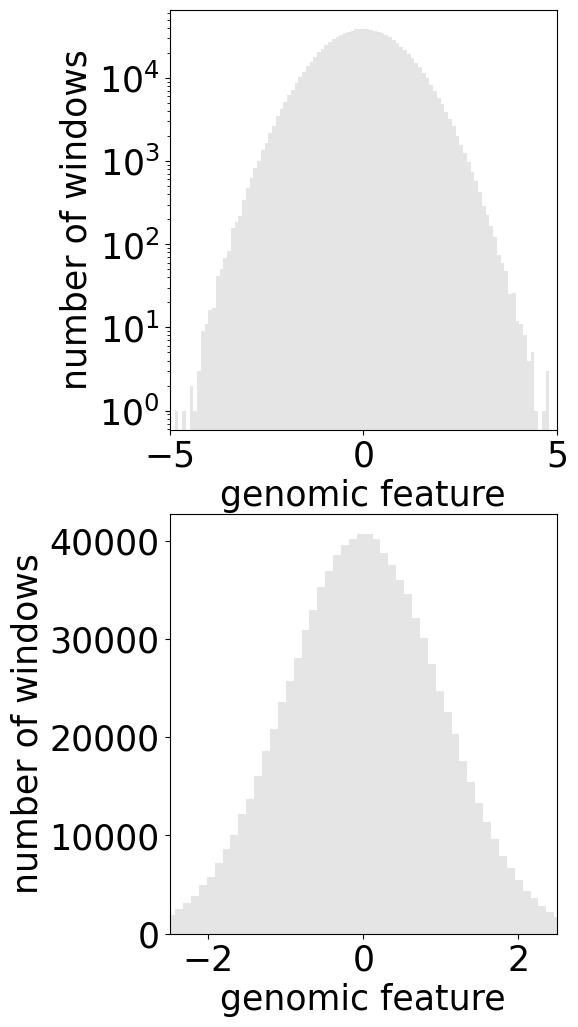

In [1]:
import matplotlib.pyplot as plt

import importlib
import generate_data
importlib.reload(generate_data)
from generate_data import plot_xs 

plt.rcParams.update({'font.size': 25})

NUMBER_EXAMPLES = 1000000 # Number of intervals

def plot_xs_wrapper():
    fig, axes = plt.subplots(2, 1, figsize=(5, 12))
    plot_xs(axes[0], NUMBER_EXAMPLES)
    plot_xs(axes[1], NUMBER_EXAMPLES, xlim=(-2.5, 2.5), yscale='linear')

plot_xs_wrapper()

## True mapping from feature to target (mimicking SNV counts)

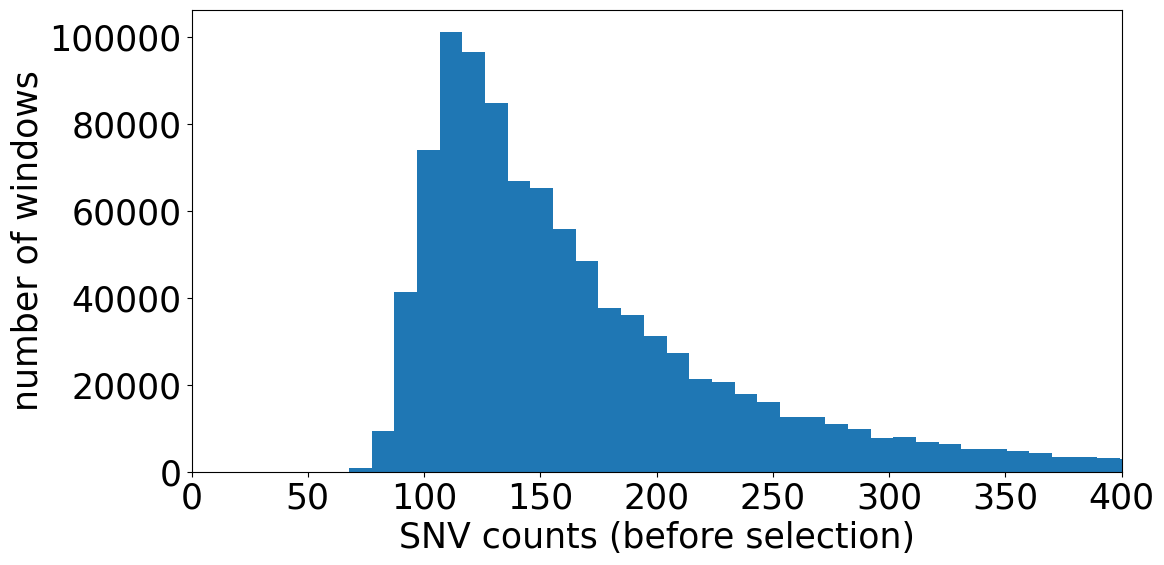

In [2]:
from generate_data import compute_true_params, plot_ys

# parameters of true model 
TRUE_PARAMS = compute_true_params(
    A = 5,
    B = 0.4,
    C = 0.1,
) 

plot_ys(TRUE_PARAMS, NUMBER_EXAMPLES)

## Introduce selection into a small fraction of examples

,x,y,constrained
0,0.445959,147,True
1,0.222791,123,True
2,-0.178701,109,True
3,0.515197,170,True
4,0.828702,205,True
...,...,...,...
999995,0.309318,183,False
999996,-1.921550,109,False
999997,-1.211054,99,False
999998,-0.325562,148,False


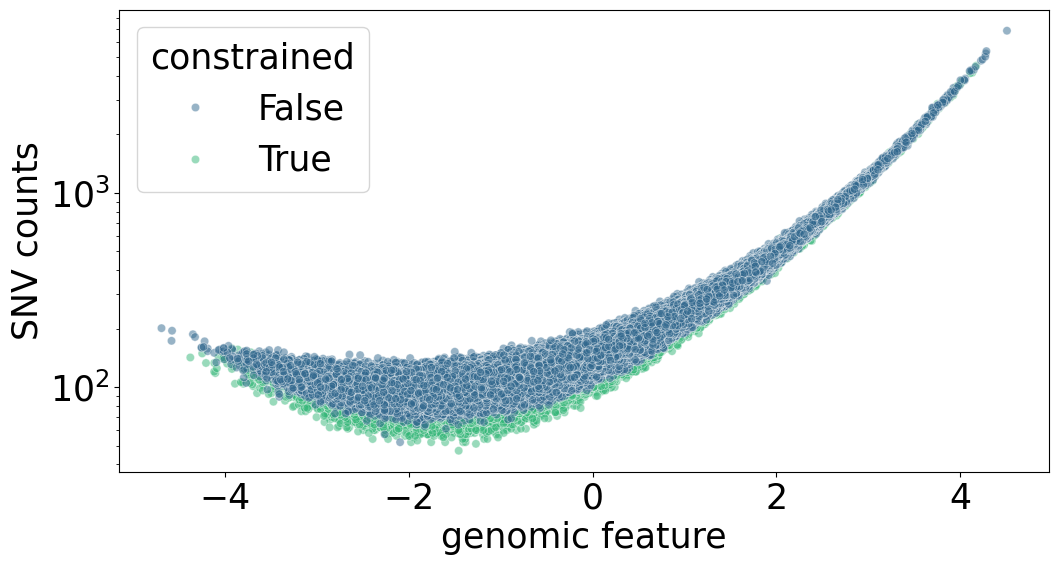

In [3]:
from generate_data import generate_xs_ys_with_selection, compute_y_pos_1

POSITIVE_FRACTION = 0.3 # informed by experiment

DATA = generate_xs_ys_with_selection(TRUE_PARAMS, NUMBER_EXAMPLES, POSITIVE_FRACTION, compute_y_pos_1)
DATA

## Fit neutral models

constant model of lambda:
alpha: 5.21 (A: 5)



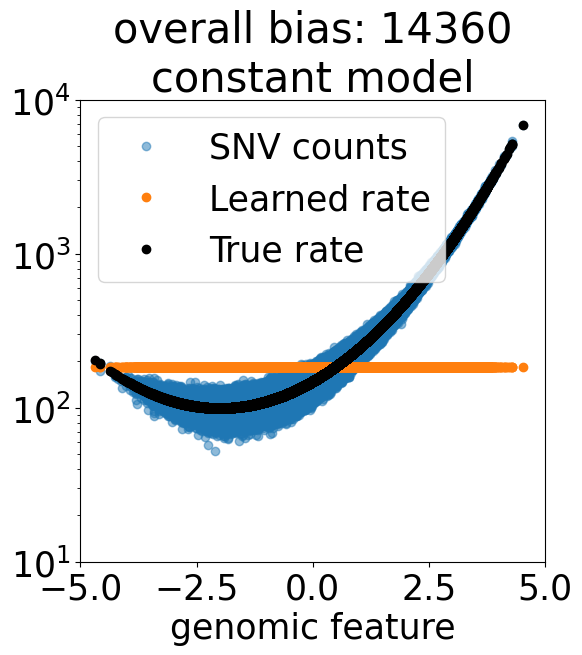

linear model of lambda:
alpha: 5.09 (A: 5)
beta: 0.50 (B: 0.4)



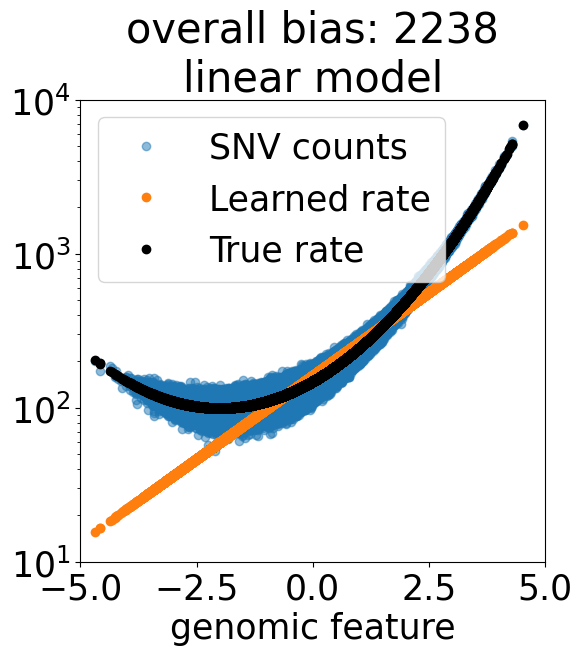

quadratic model of lambda:
alpha: 5.00 (A: 5)
beta: 0.40 (B: 0.4)
gamma: 0.10 (C: 0.1)



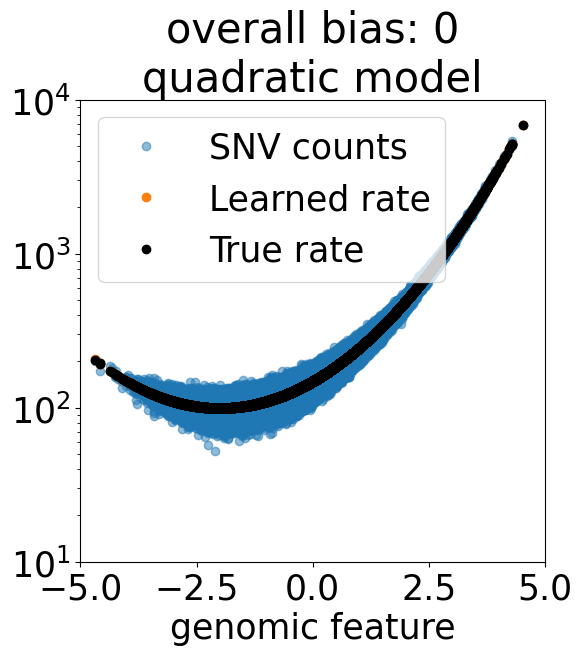

,x,y,constrained,predicted_y_constantModel,residuals_constantModel,standardized_residuals_constantModel,predicted_y_linearModel,residuals_linearModel,standardized_residuals_linearModel,x2,predicted_y_quadraticModel,residuals_quadraticModel,standardized_residuals_quadraticModel
0,0.445959,147,True,183.439394,36.439394,2.690450,202.238637,55.238637,3.884283,0.198879,180.963060,33.963060,2.524712
1,0.222791,123,True,183.439394,60.439394,4.462454,180.936492,57.936492,4.307141,0.049636,163.058344,40.058344,3.137050
2,-0.178701,109,True,183.439394,74.439394,5.496124,148.102909,39.102909,3.213122,0.031934,138.623900,29.623900,2.516073
3,0.515197,170,True,183.439394,13.439394,0.992278,209.344193,39.344193,2.719257,0.265428,187.286882,17.286882,1.263173
4,0.828702,205,True,183.439394,-21.560606,-1.591896,244.774282,39.774282,2.542257,0.686748,221.445238,16.445238,1.105114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.309318,183,False,183.439394,0.439394,0.032442,188.915664,5.915664,0.430397,0.095678,169.579228,-13.420772,-1.030602
999996,-1.921550,109,False,183.439394,74.439394,5.496124,62.096210,-46.903790,-5.952171,3.692354,99.577009,-9.422991,-0.944298
999997,-1.211054,99,False,183.439394,84.439394,6.234459,88.502890,-10.497110,-1.115812,1.466652,105.892004,6.892004,0.669752
999998,-0.325562,148,False,183.439394,35.439394,2.616616,137.642861,-10.357139,-0.882801,0.105991,131.688306,-16.311694,-1.421430


In [4]:
import importlib
import fit_neutral_models
importlib.reload(fit_neutral_models)
from fit_neutral_models import fit_poisson_model_wrapper

MODEL_TYPES = ['constant', 'linear', 'quadratic'] 

DATA = fit_poisson_model_wrapper(DATA, MODEL_TYPES, TRUE_PARAMS)
DATA

## Residuals are biased when models are misspecified 

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

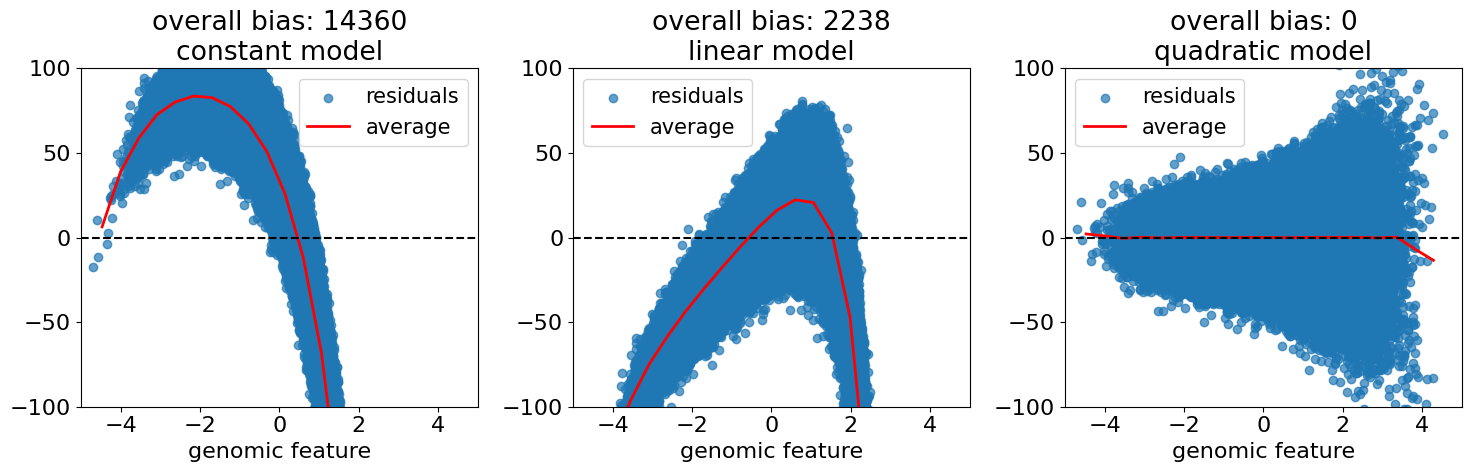

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

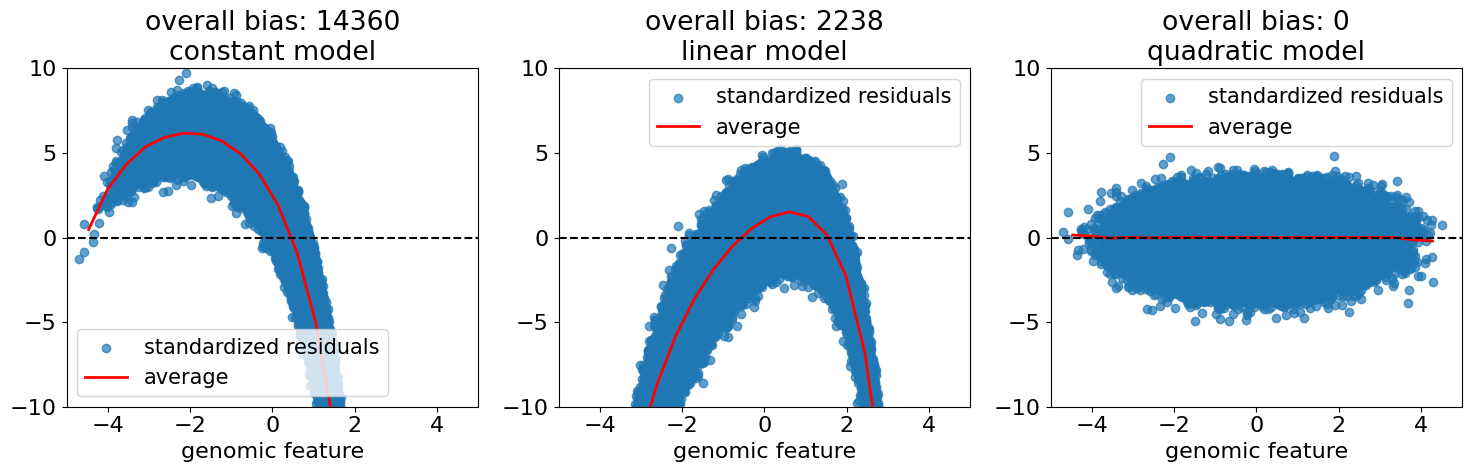

In [5]:
import importlib
import plot_residuals
importlib.reload(plot_residuals)
from plot_residuals import plot_residuals_vs_feature_all_models

plt.rcParams.update({'font.size': 16})

plot_residuals_vs_feature_all_models(DATA, standardized=False, model_types=MODEL_TYPES, true_params=TRUE_PARAMS)
plot_residuals_vs_feature_all_models(DATA, standardized=True, model_types=MODEL_TYPES, true_params=TRUE_PARAMS)

## Stratify neutral models' performances by x

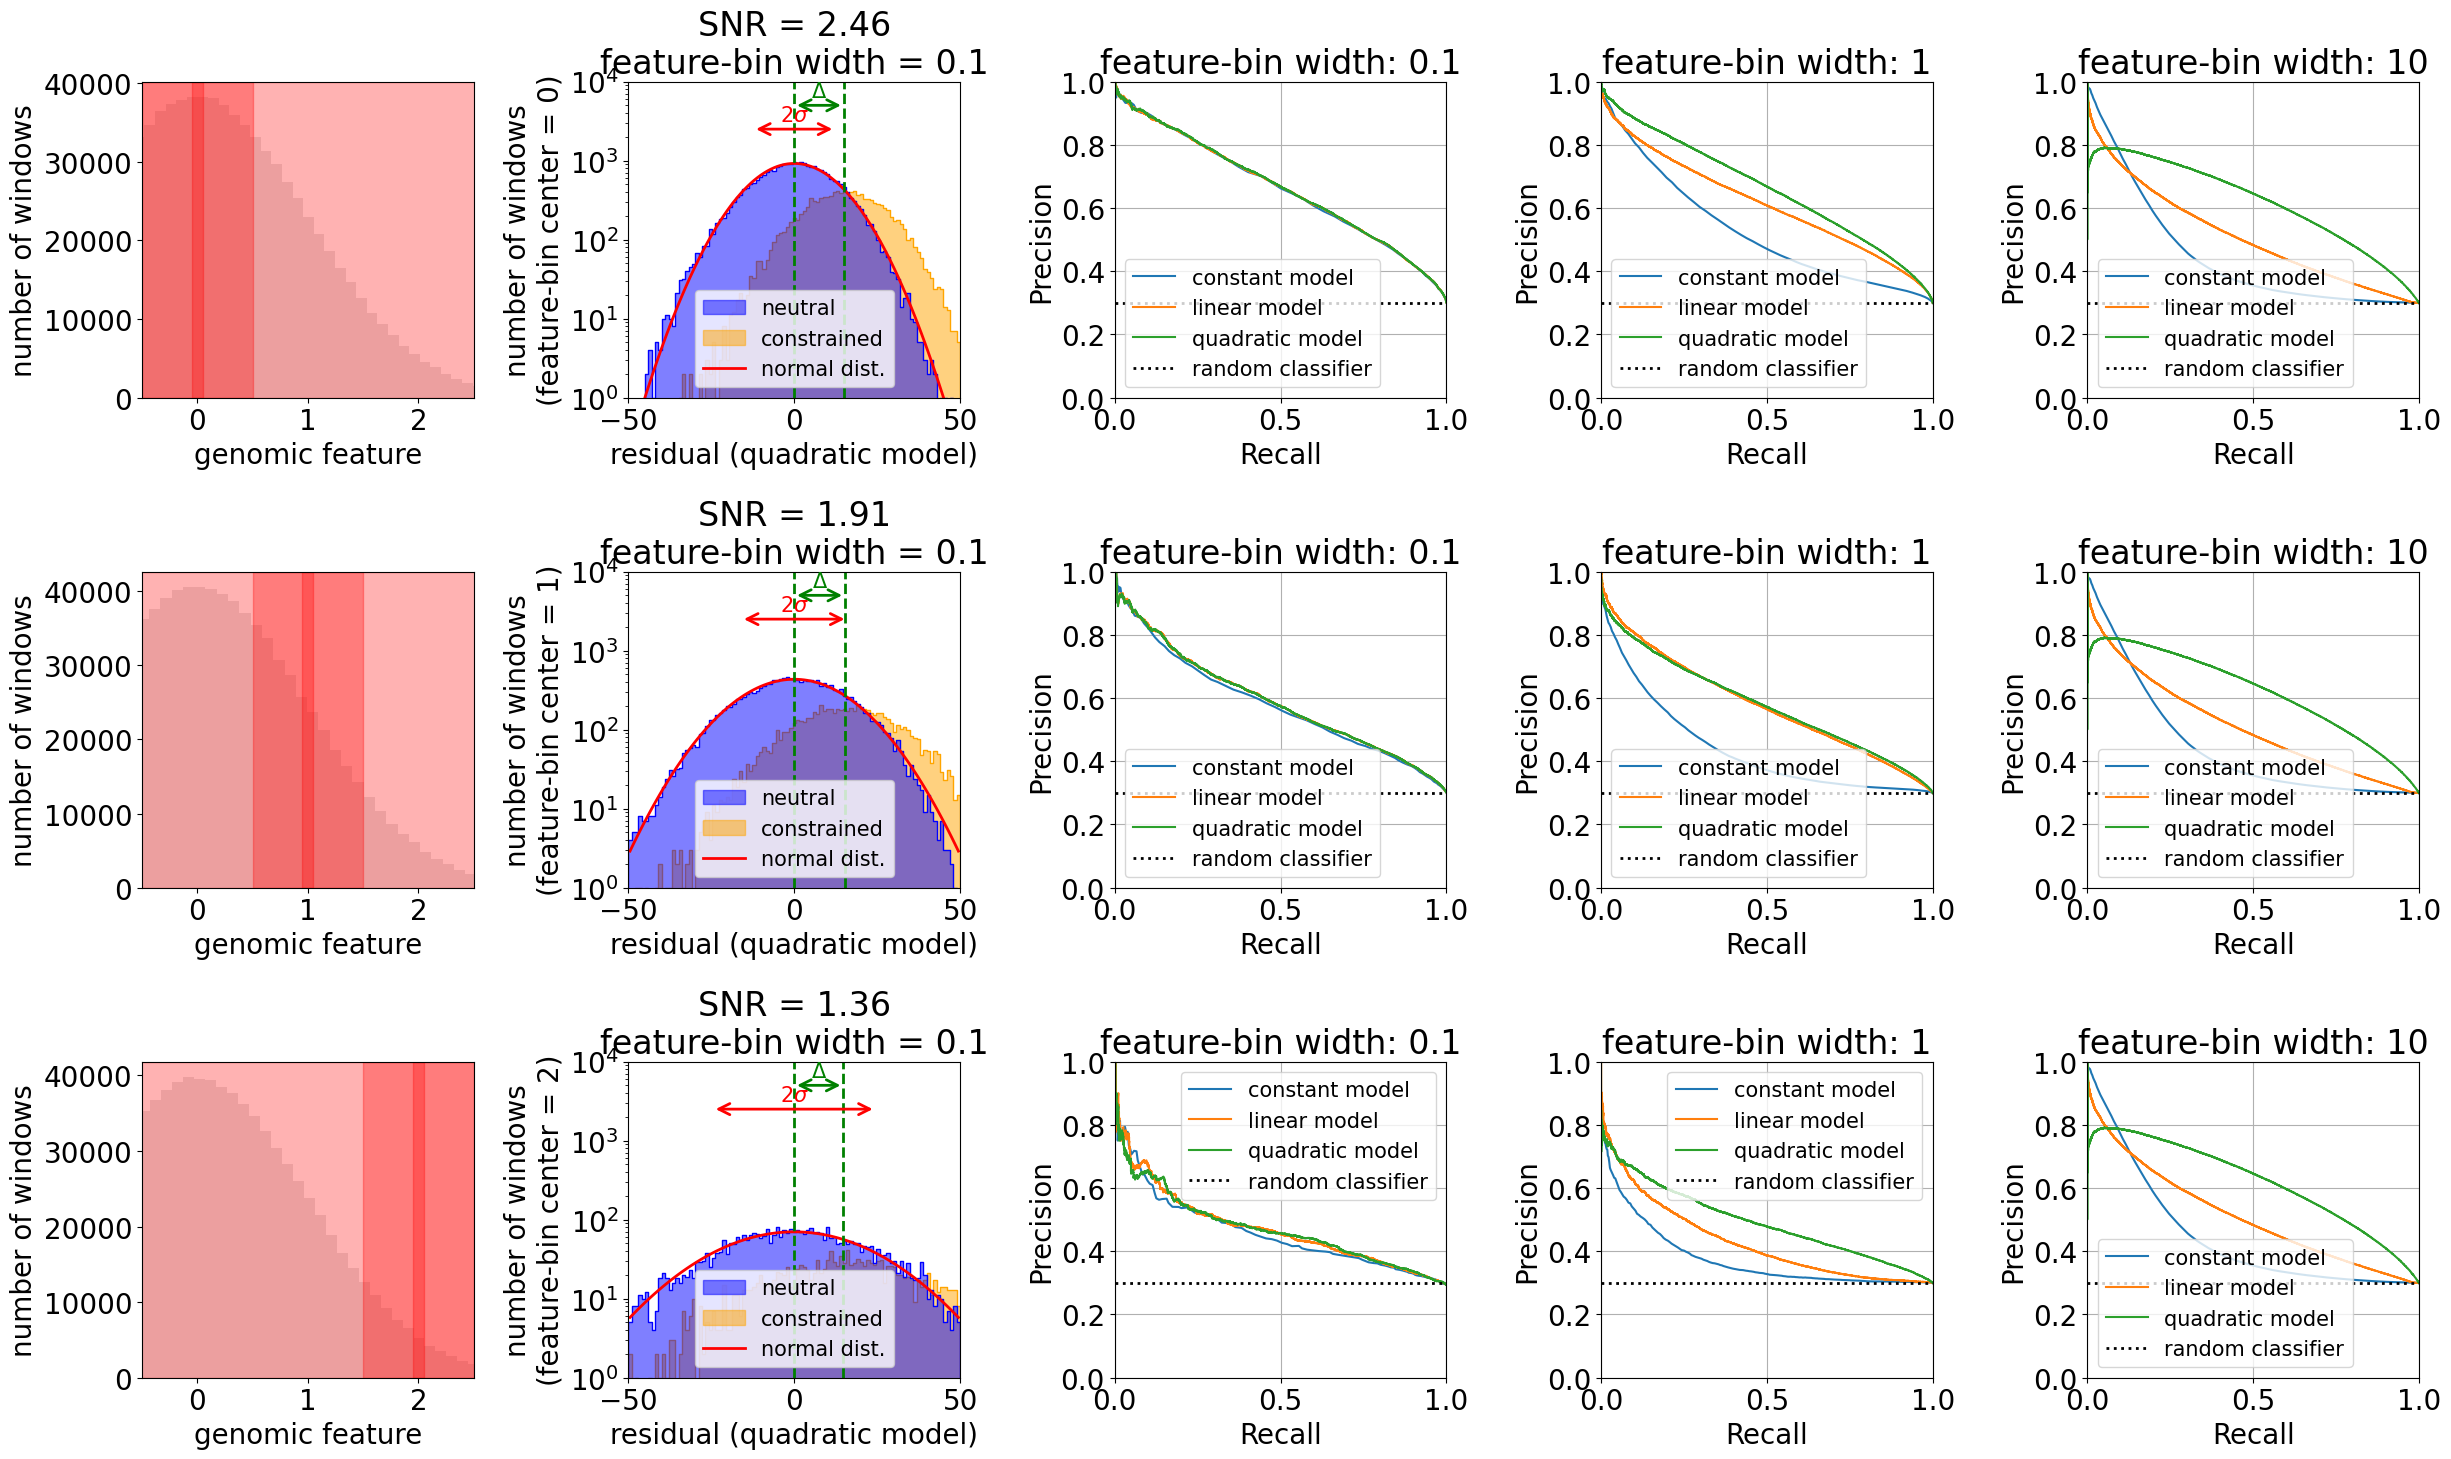

In [6]:
import importlib
import predict_constraint
importlib.reload(predict_constraint)
from predict_constraint import plot_pr_curve_wrapper

plt.rcParams.update({'font.size': 20})

plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-50, 50), ylim_residual=(1, 1e4), standardized=False, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1, 10])

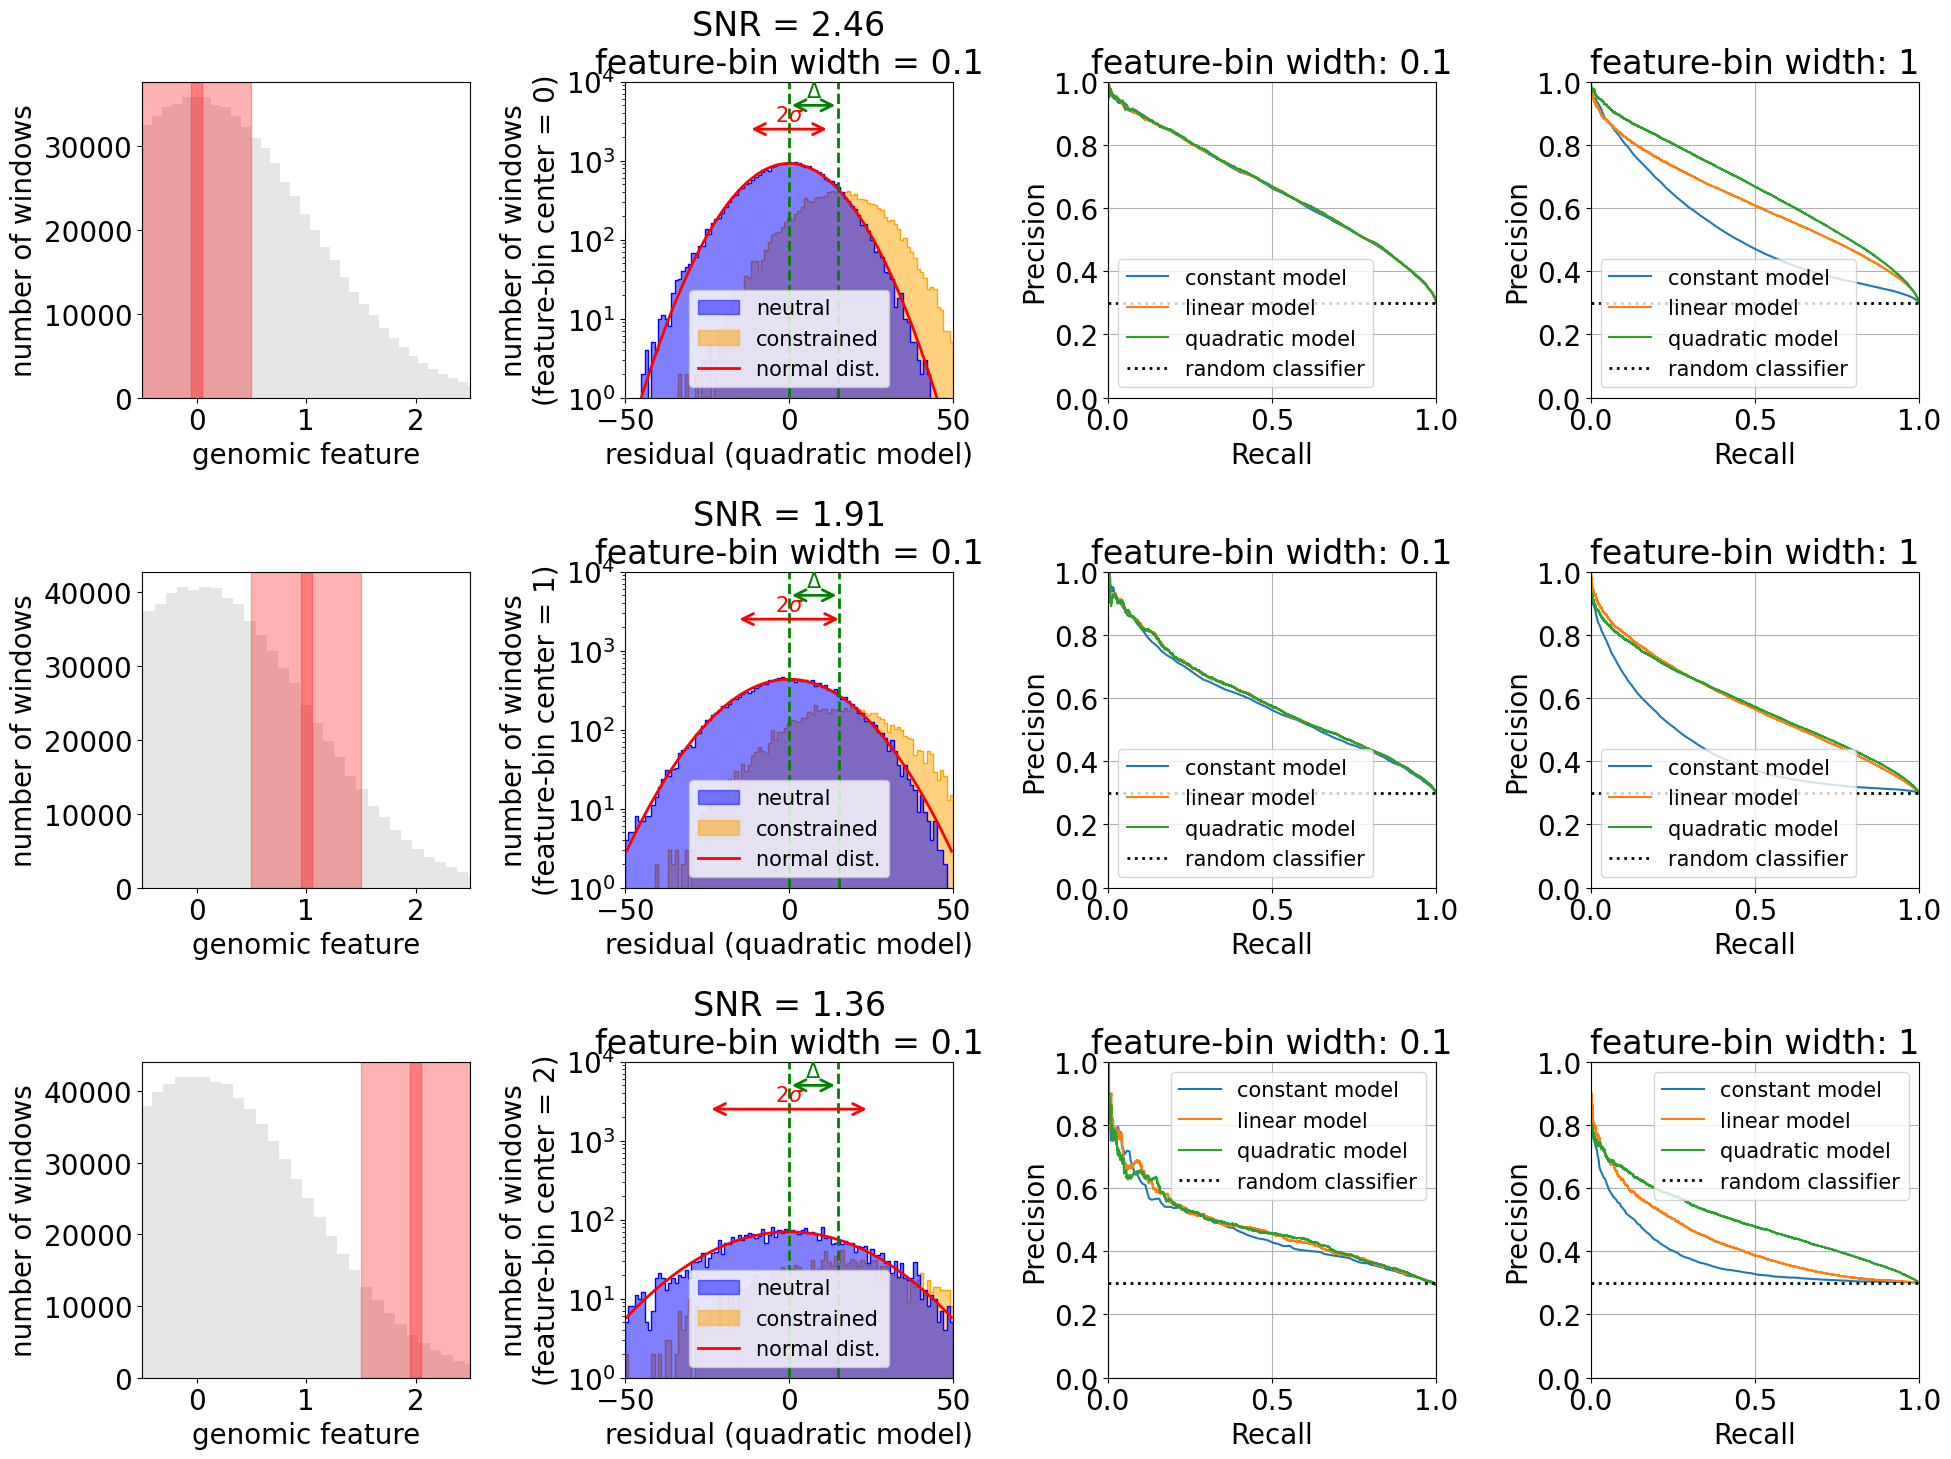

In [7]:
plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-50, 50), ylim_residual=(1, 1e4), standardized=False, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1])

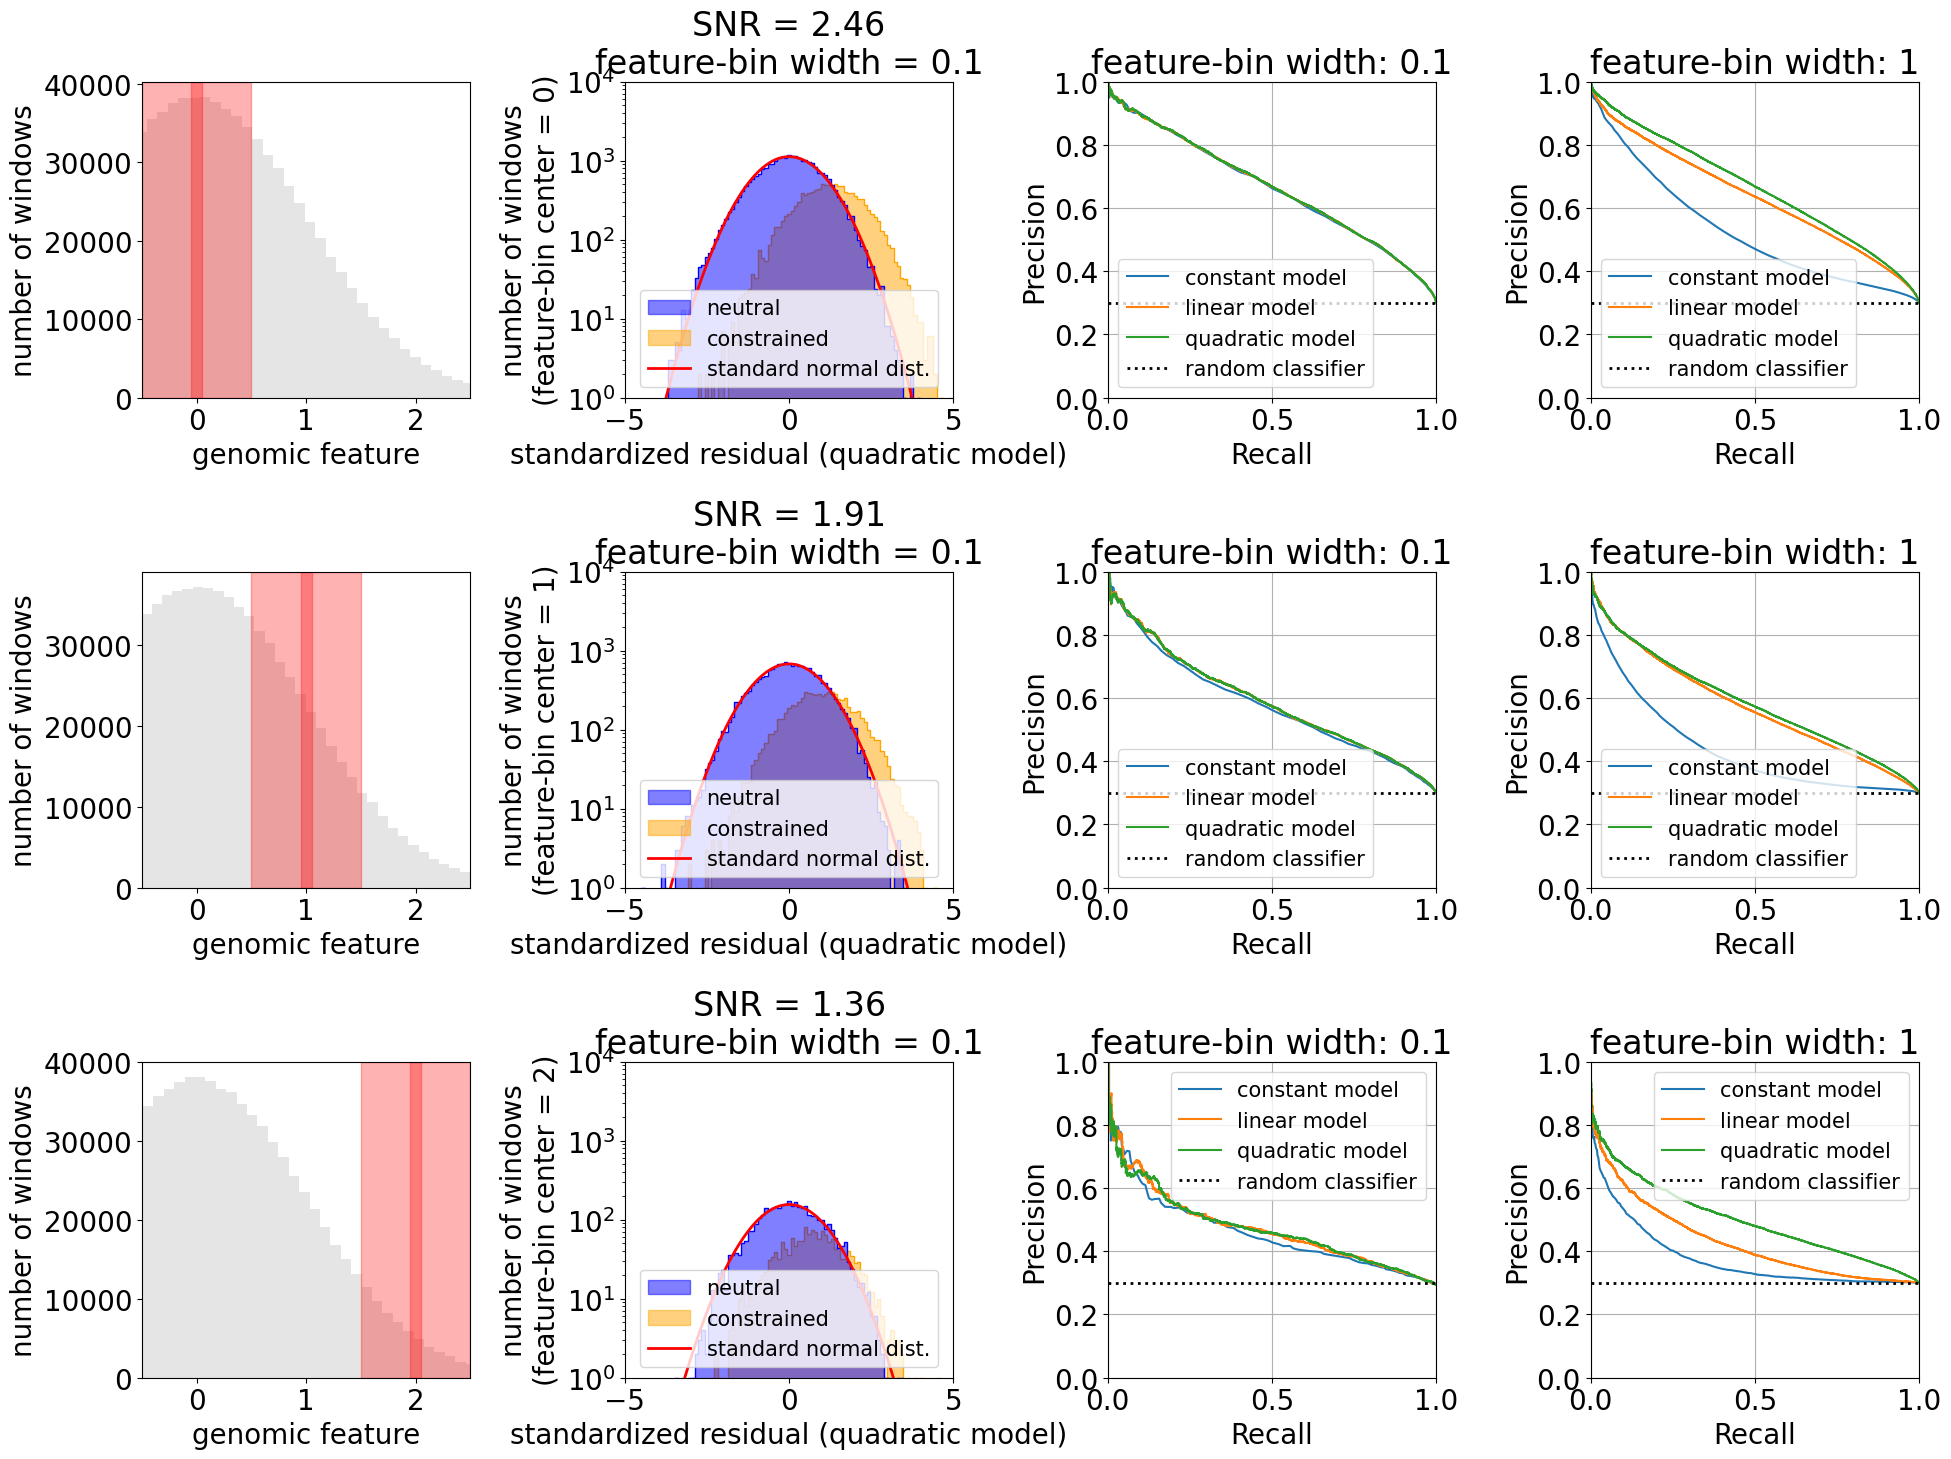

In [8]:
plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-5, 5), ylim_residual=(1, 1e4), standardized=True, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1])

## Model bias is responsible for poor genome-wide performance 

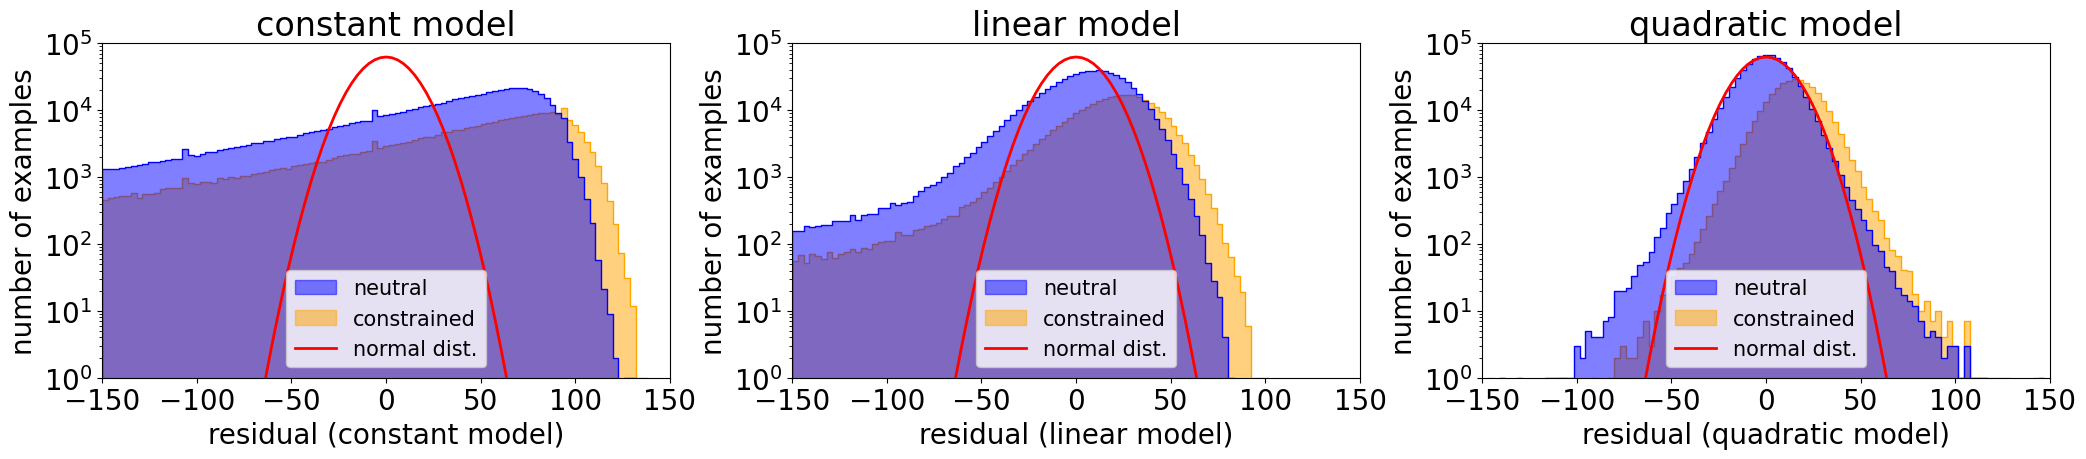

In [9]:
from predict_constraint import plot_residual_distributions_all_models

plot_residual_distributions_all_models(DATA, standardized=False, xlim=(-150, 150), model_types=MODEL_TYPES)

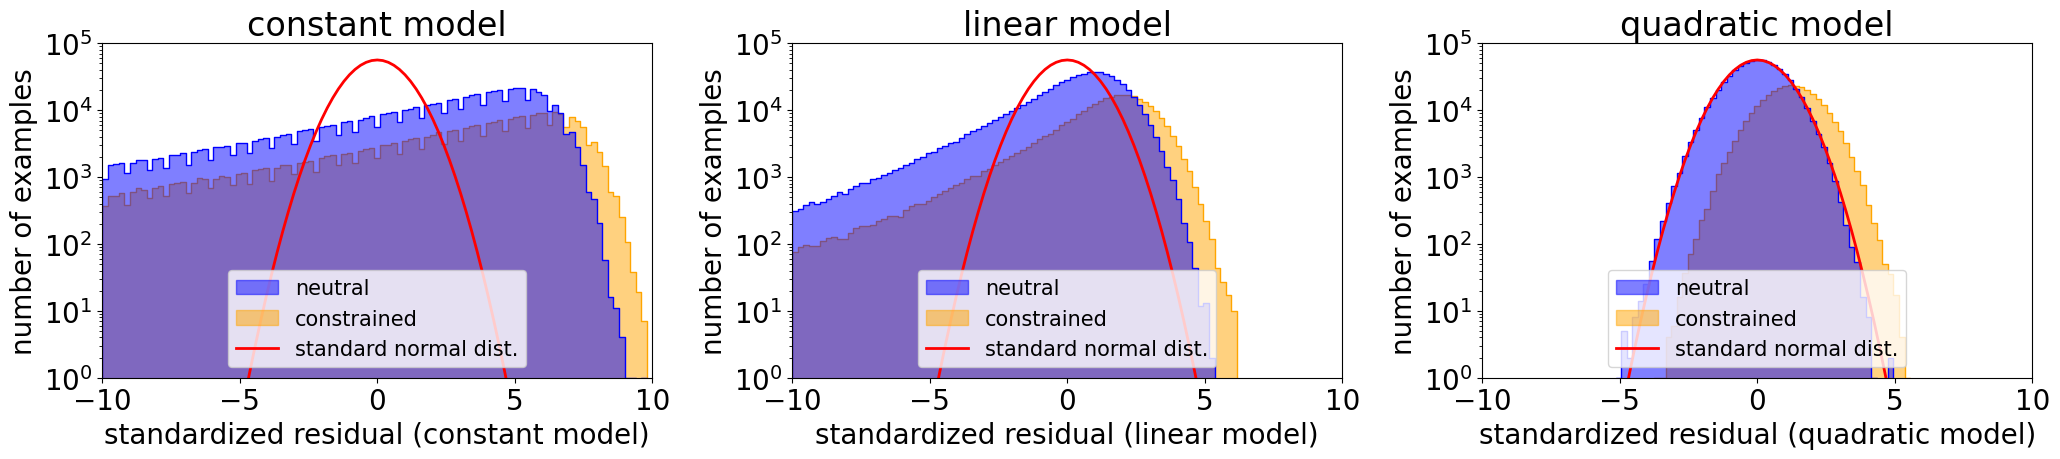

In [10]:
plot_residual_distributions_all_models(DATA, standardized=True, xlim=(-10, 10), model_types=MODEL_TYPES)

## How observed and expected SNV counts depend on standardized residuals

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


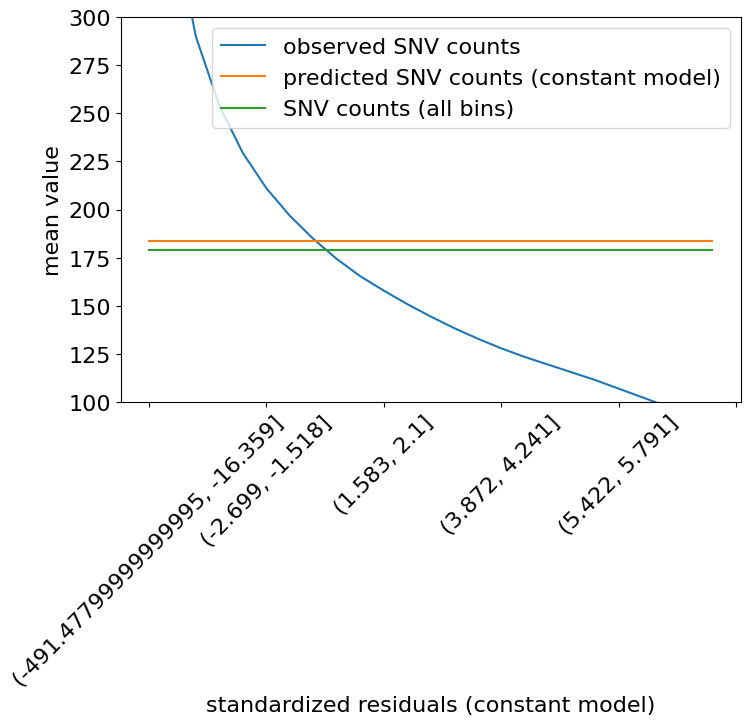

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


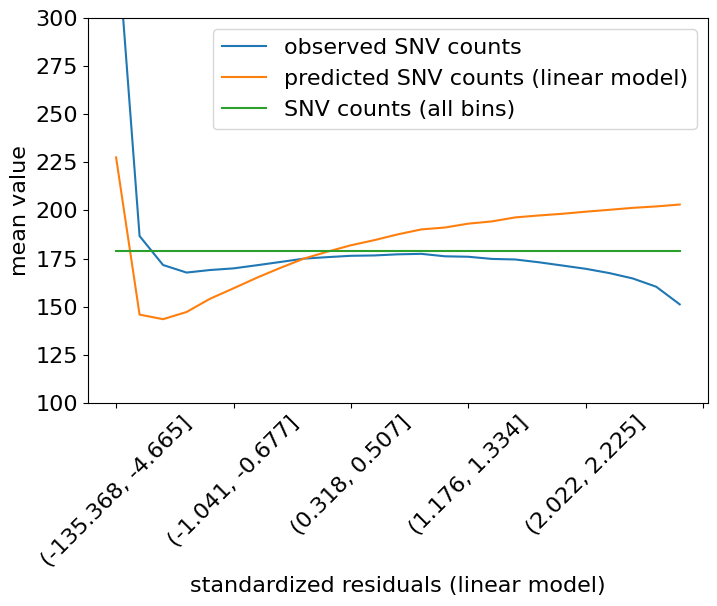

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


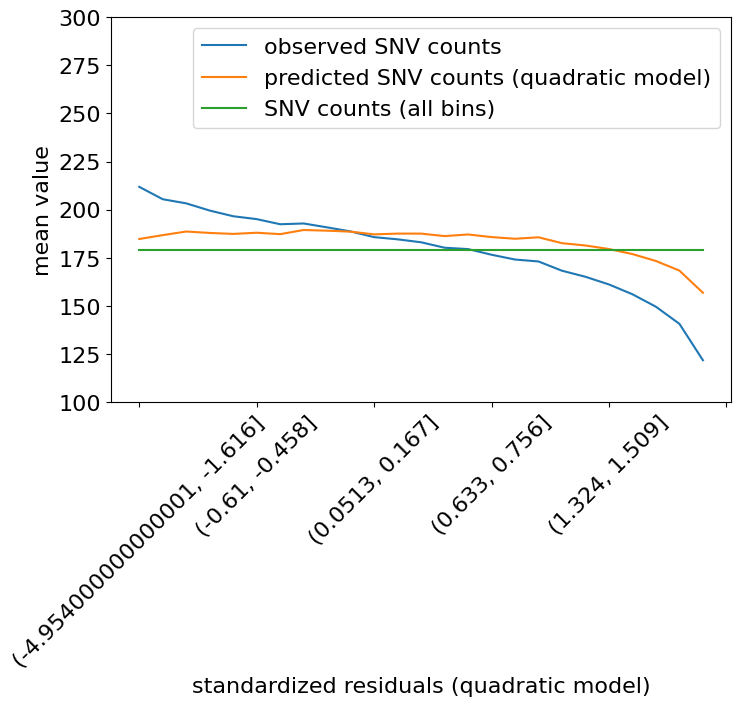

In [11]:
from snv_counts_vs_residuals import plot_snv_counts_vs_residuals_all_models

plt.rcParams.update({'font.size': 16})

plot_snv_counts_vs_residuals_all_models(DATA, MODEL_TYPES)

## How observed and expected SNV counts depend on z-scores in real experimental data

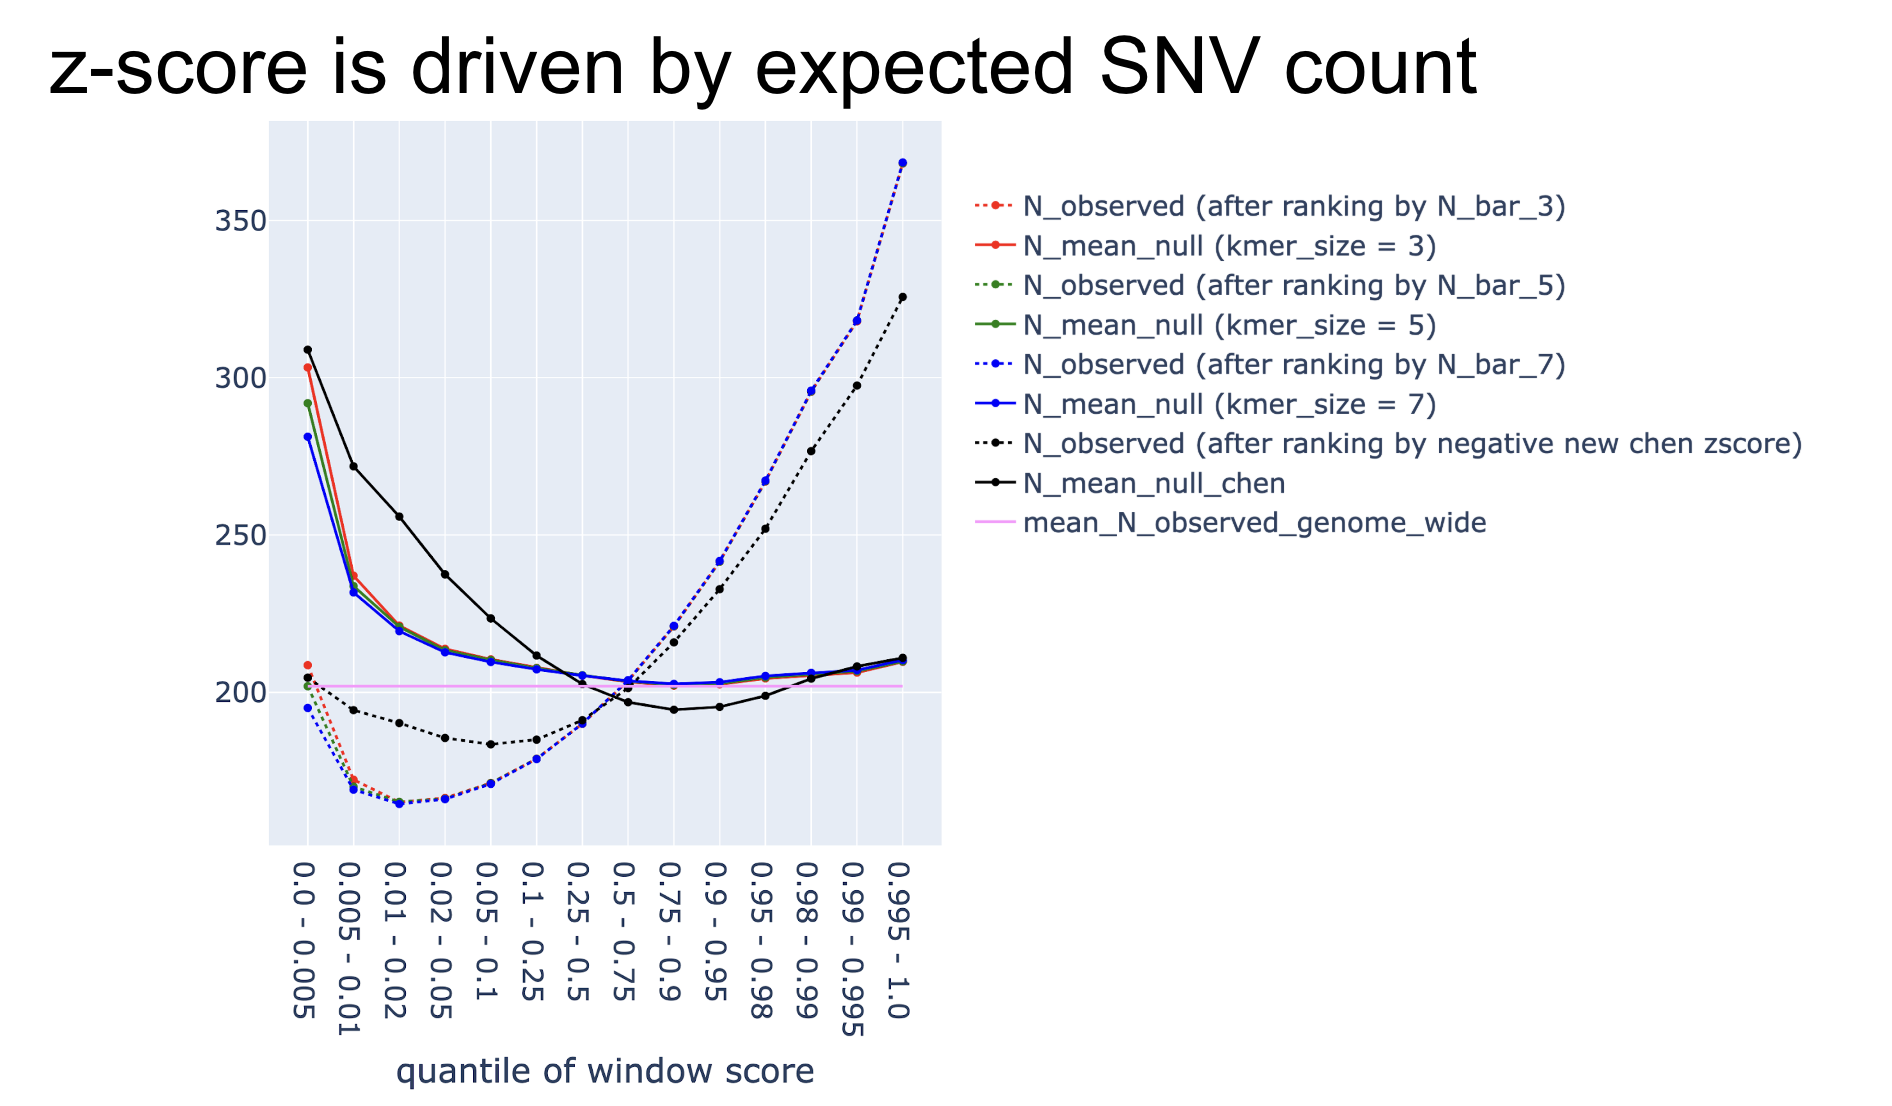

In [12]:
from IPython.display import Image

# smaller z-score is more constrained in the plot below 
# source: https://docs.google.com/presentation/d/1QyoCJSHlWG4FqyFuJ-mO7U-R0cqsIq5GhYjReAO1s60/edit#slide=id.g2257848117b_0_175
Image(filename='SNV-counts-vs-zscores.png', width=800)